In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re

In [3]:
input_file ="Energy_2020_03_13_03_55_PM.csv"
out_filename = "energy_preprocess.csv"

In [4]:
# Convert all white spaces into comma

f_out = open(out_filename,'w+')
with open(input_file, 'r') as f:
    for line in f:
        striped_line = re.sub("\s+", "|", line.strip())
        f_out.write(striped_line + '\n')
        #print ( striped_line )

f_out.close()


In [5]:
#read data from the csv
data = pd.read_csv(out_filename, sep="|", header=None, error_bad_lines=False, comment='#')

In [6]:
#data 
#from IPython.display import display
#pd.options.display.max_columns = None
#display(data)

In [7]:
data.columns = ['NodeName','Arch','CoresPerSocket','CPUAlloc','CPUErr','CPUTot','CPULoad',\
              'AvailableFeatures','ActiveFeatures','Gres','NodeAddr','NodeHostName','Version',\
              'OS','RealMemory','AllocMem','FreeMem','Sockets','Boards','State','ThreadsPerCore','TmpDisk','Weight',\
              'Owner','MCS_label','Partitions','BootTime','SlurmdStartTime','CfgTRES','AllocTRES','CapWatts','CurrentWatts',\
              'LowestJoules','ConsumedJoules','ExtSensorsJoules','ExtSensorsWatts','ExtSensorsTemp']

In [8]:
# remove preceeding values 
data = data.replace(to_replace ="NodeName=", value ="", regex=True) 
data = data.replace(to_replace ="Arch=", value ="", regex=True) 
data = data.replace(to_replace ="CoresPerSocket=", value ="", regex=True) 
data = data.replace(to_replace ="CPUAlloc=", value ="", regex=True) 
data = data.replace(to_replace ="CPUErr=", value ="", regex=True) 
data = data.replace(to_replace ="CPUTot=", value ="", regex=True)
data = data.replace(to_replace ="CPULoad=", value ="", regex=True)
data = data.replace(to_replace ="AvailableFeatures=", value ="", regex=True)
data = data.replace(to_replace ="ActiveFeatures=", value ="", regex=True)
data = data.replace(to_replace ="Gres=", value ="", regex=True)
data = data.replace(to_replace ="NodeAddr=", value ="", regex=True)
data = data.replace(to_replace ="Version=", value ="", regex=True)
data = data.replace(to_replace ="NodeHostName=", value ="", regex=True)
data = data.replace(to_replace ="OS=", value ="", regex=True)
data = data.replace(to_replace ="RealMemory=", value ="", regex=True)
data = data.replace(to_replace ="AllocMem=", value ="", regex=True)
data = data.replace(to_replace ="FreeMem=", value ="", regex=True)
data = data.replace(to_replace ="Sockets=", value ="", regex=True)
data = data.replace(to_replace ="Boards=", value ="", regex=True)
data = data.replace(to_replace ="State=", value ="", regex=True)
data = data.replace(to_replace ="ThreadsPerCore=", value ="", regex=True)
data = data.replace(to_replace ="TmpDisk=", value ="", regex=True)
data = data.replace(to_replace ="Weight=", value ="", regex=True)
data = data.replace(to_replace ="Owner=", value ="", regex=True)
data = data.replace(to_replace ="MCS_label=", value ="", regex=True)
data = data.replace(to_replace ="ThreadsPerCore=", value ="", regex=True)
data = data.replace(to_replace ="Partitions=", value ="", regex=True)
data = data.replace(to_replace ="BootTime=", value ="", regex=True)
data = data.replace(to_replace ="SlurmdStartTime=", value ="", regex=True)
data = data.replace(to_replace ="CfgTRES=", value ="", regex=True)
data = data.replace(to_replace ="AllocTRES=", value ="", regex=True)
data = data.replace(to_replace ="CapWatts=", value ="", regex=True)
data = data.replace(to_replace ="CurrentWatts=", value ="", regex=True)
data = data.replace(to_replace ="LowestJoules=", value ="", regex=True)
data = data.replace(to_replace ="ConsumedJoules=", value ="", regex=True)
#data = data.replace(to_replace ="ConsumedJoules=", value ="", regex=True)
data = data.replace(to_replace ="ExtSensorsJoules=", value ="", regex=True)
data = data.replace(to_replace ="ExtSensorsWatts=", value ="", regex=True)
data = data.replace(to_replace ="ExtSensorsTemp=", value ="", regex=True)

#data 

In [9]:
# remove some wierd nodes for now 
data = data[data.NodeName != "westmere01"]
data = data[data.NodeName != "serial02"]
data = data[data.NodeName != "node103"]
data = data[data.NodeName != "node93"]
data = data[data.NodeName != "node109"]
data = data[data.NodeName != "node132"]
data = data[data.NodeName != "node133"]
data = data[data.NodeName != "node134"]
#data

In [10]:
# Remove nodes that were not recording any data 
data = data[data.NodeName != "nehalem01"]
data = data[data.NodeName != "nehalem02"]

# Change 
cols = ['ConsumedJoules', 'LowestJoules']
data[cols] = data[cols].applymap(np.int64)
#data

In [11]:
# sava data to csv 
data.to_csv("processed_energy.csv", index=False)

In [12]:
#create link between the available features to short hand
# omnipart,128gb,broadwell-ep,e5-2640v4  - o_128_b_264
# omnipart,192,broadwell-ep,e5-2640v - o_192_b_264
# infiniband,32gb,sandybridge-ep,e5-2620 - i_32_s_262
# infiniband,64gb,ivybridge-ep,e5-2680v2 - i_64_i_268
# 128gb,broadwell-ep,e5-2640v4 - 128_b_264
# 32gb,sandybridge-ep,e5-2665 - 32_s_2665
# infiniband,32gb,sandybridge-ep,e5-2650 - i_32_s_265
# infiniband,64gb,ivybridge-ep,e5-2680v2 - i_64_i_268
# 32gb,sandybridge-ep,e5-2650 - 32_s_265

data = data.replace(to_replace ="omnipart,128gb,broadwell-ep,e5-2640v4", value ="o_128_b_264", regex=True) 
data = data.replace(to_replace ="omnipart,192,broadwell-ep,e5-2640v", value ="o_192_b_264", regex=True) 
data = data.replace(to_replace ="infiniband,32gb,sandybridge-ep,e5-2620", value ="i_32_s_262", regex=True) 
data = data.replace(to_replace ="infiniband,64gb,ivybridge-ep,e5-2680v2", value ="i_64_i_268", regex=True) 
data = data.replace(to_replace ="128gb,broadwell-ep,e5-2640v4", value ="128_b_264", regex=True) 
data = data.replace(to_replace ="32gb,sandybridge-ep,e5-2665", value ="32_s_2665", regex=True)
data = data.replace(to_replace ="infiniband,32gb,sandybridge-ep,e5-2650", value ="i_32_s_265", regex=True)
data = data.replace(to_replace ="infiniband,64gb,ivybridge-ep,e5-2680v2", value ="i_64_i_268", regex=True)
data = data.replace(to_replace ="32gb,sandybridge-ep,e5-2650", value ="32_s_265", regex=True)



In [13]:
#deep analysis using different parttions to see how different hardware uses energy.


In [16]:
# Aggregate by partitition and features 
pf_pie_data = data.groupby(['Partitions', 'AvailableFeatures'])['ConsumedJoules', 'LowestJoules'].agg('max')
#f_pie_data = data.groupby(['Partitions'])['ConsumedJoules', 'LowestJoules'].agg({'sum'})
#pf_pie_data.div(f_pie_data, level='Partitions') * 100
pf_pie_data

ConsumedJoules  LowestJoules
Partitions AvailableFeatures                              
cmsp       o_128_b_264              97320117        852963
           o_192_b_2644            110013944        916748
esp        i_32_s_262               18727986        107149
esp1       i_64_i_268               60416246        207398
gpu        128_b_264                14455238        327905
           32_s_2665                22178750         89486
long       i_32_s_262               31452559        198809
           i_32_s_265               46092211        208204
           i_64_i_268              119686058        196102
serial     32_s_265                 42151075         99783
testing    32_s_265                 39330559        113153

In [14]:
# Create enrgy pie_data 
#plot = pf_pie_data.plot.pie(subplots=True, autopct='%1.1f%%',shadow=True, startangle=90, figsize=(20, 8))

In [15]:
#Aggregate using agg per partition 
pie_data = data.groupby(['Partitions'])['ConsumedJoules', 'LowestJoules'].agg('sum')
pie_data

,ConsumedJoules,LowestJoules
Partitions,,
cmsp,3713949383,21143112
esp,476253577,1924830
esp1,944937556,3261296
gpu,36633988,417391
long,1848630462,4401919
serial,42151075,99783
testing,76337866,219331


In [16]:
# Get the pandas series 
#pie_data
#type(pie_data)
#pie_data.index
#x = pie_data.to_numpy()
#x = x/1000000
#x

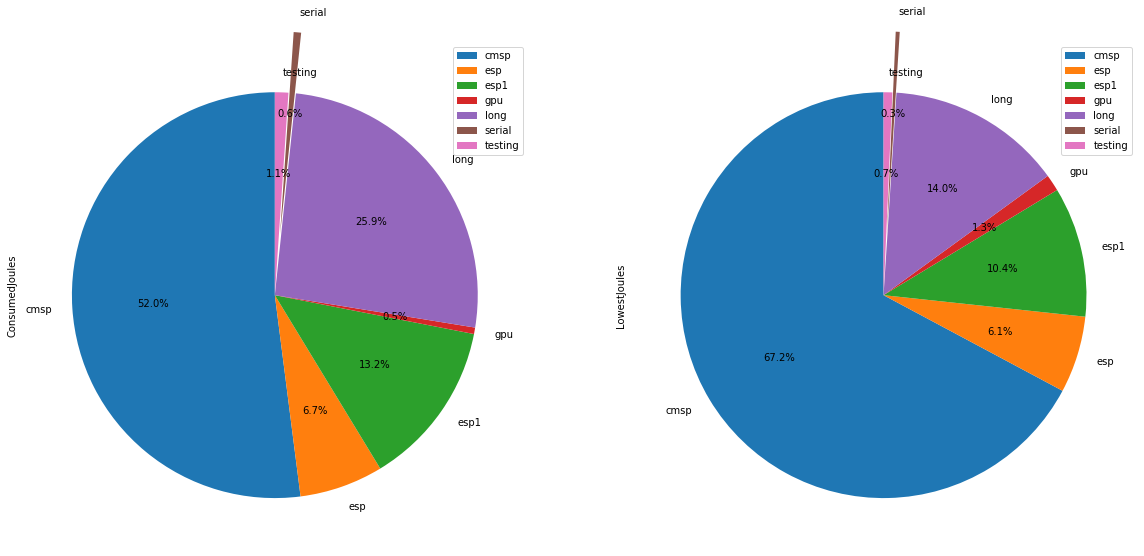

In [17]:
# Create enrgy pie_data 
plot = pie_data.plot.pie(subplots=True, autopct='%1.1f%%',explode=(0, 0, 0, 0, 0, 0.3, 0), startangle=90, figsize=(20, 10))

In [18]:
sub_data = data.loc[:, ['ConsumedJoules','NodeName','LowestJoules', 'Partitions', 'AvailableFeatures']]
sub_data

,ConsumedJoules,NodeName,LowestJoules,Partitions,AvailableFeatures
0,14455238,gpu01,327905,gpu,128_b_264
1,22178750,gpu02,89486,gpu,32_s_2665
4,97320117,node01,508775,cmsp,o_128_b_264
5,92215966,node02,348011,cmsp,o_128_b_264
6,96752409,node03,502728,cmsp,o_128_b_264
...,...,...,...,...,...
144,91436006,node183,599478,cmsp,o_192_b_2644
145,86243392,node184,415349,cmsp,o_192_b_2644
146,42151075,serial01,99783,serial,32_s_265
148,39330559,testing01,113153,testing,32_s_265


In [19]:
#Get the statistsics of the database classification 
sub_data.describe()

,ConsumedJoules,LowestJoules
count,1.410000e+02,141.000000
mean,5.063045e+07,223174.907801
std,3.736657e+07,217826.283953
min,1.165522e+07,10272.000000
25%,1.555680e+07,81566.000000
50%,3.145256e+07,128075.000000
75%,9.038793e+07,347885.000000
max,1.196861e+08,916748.000000


In [20]:
# Calulcate this per feature.
feature_pie_data = data.groupby(['AvailableFeatures'])['ConsumedJoules', 'LowestJoules'].agg('sum')
feature_pie_data

,ConsumedJoules,LowestJoules
AvailableFeatures,,
128_b_264,14455238,327905
32_s_265,118488941,319114
32_s_2665,22178750,89486
i_32_s_262,740683146,3436057
i_32_s_265,200823181,1214859
i_64_i_268,2328315268,4937129
o_128_b_264,1440926425,8533627
o_192_b_2644,2273022958,12609485


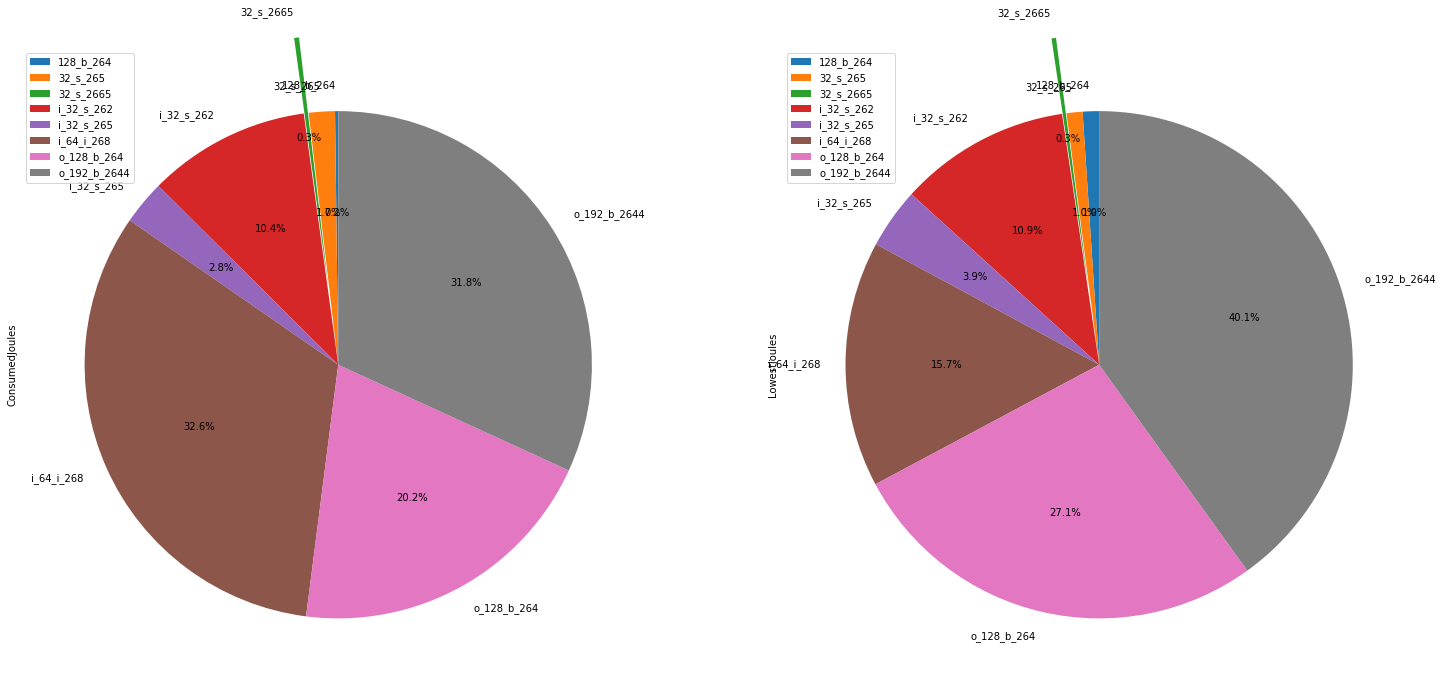

In [49]:
# Create enrgy pie_data  for features 
plot1 = feature_pie_data.plot.pie(subplots=True, autopct='%1.1f%%',explode=(0, 0, 0.3, 0, 0, 0, 0,0), 
         startangle=90, figsize=(25, 20))

In [22]:
# do analysis for cmsp
#cmsp_data= data[]
cmsp_data = sub_data.loc[sub_data['Partitions'] == 'cmsp']  

In [23]:
cmsp_pie_data = cmsp_data.groupby(['AvailableFeatures'])['ConsumedJoules', 'LowestJoules'].agg('sum')
cmsp_pie_data

,ConsumedJoules,LowestJoules
AvailableFeatures,,
o_128_b_264,1440926425,8533627
o_192_b_2644,2273022958,12609485


In [24]:
cmsp_data.describe()

,ConsumedJoules,LowestJoules
count,4.000000e+01,40.000000
mean,9.284873e+07,528577.800000
std,7.168296e+06,171718.014154
min,8.275015e+07,158175.000000
25%,8.765353e+07,388712.500000
50%,9.221436e+07,505751.500000
75%,9.689434e+07,645910.000000
max,1.100139e+08,916748.000000


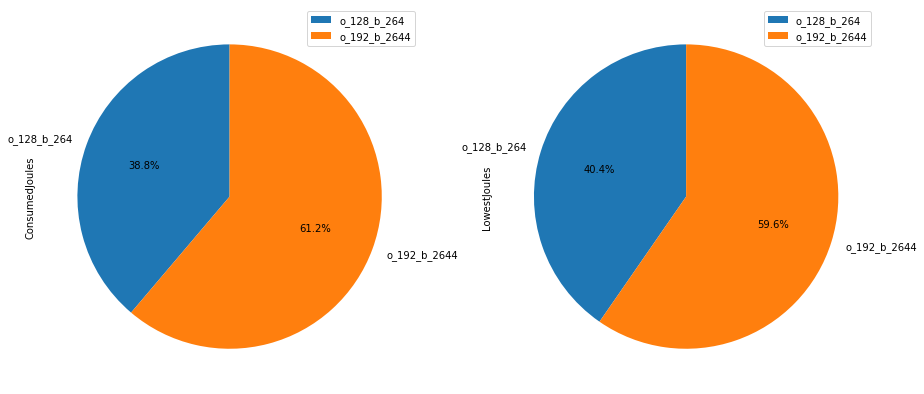

In [25]:
#csm energy plot 
plot1 = cmsp_pie_data.plot.pie(subplots=True, autopct='%1.1f%%',startangle=90, figsize=(15, 8))

In [26]:
# do analysis for long
#cmsp_data= data[]
long_data = sub_data.loc[sub_data['Partitions'] == 'long']  
long_pie_data = long_data.groupby(['AvailableFeatures'])['ConsumedJoules', 'LowestJoules'].agg('sum')
long_pie_data
long_pie_data.describe()

,ConsumedJoules,LowestJoules
count,3.000000e+00,3.000000e+00
mean,6.162102e+08,1.467306e+06
std,6.651473e+08,2.336044e+05
min,2.008232e+08,1.214859e+06
25%,2.326264e+08,1.363043e+06
50%,2.644296e+08,1.511227e+06
75%,8.239036e+08,1.593530e+06
max,1.383378e+09,1.675833e+06


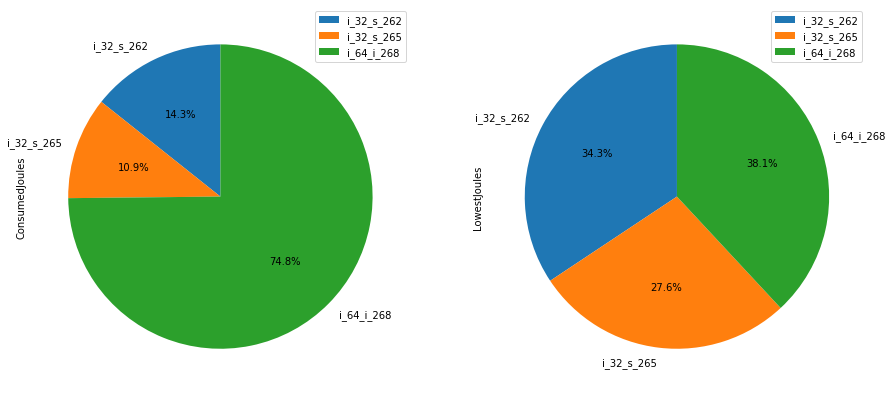

In [40]:
#long energy plot 
long_pie = long_pie_data.plot.pie(subplots=True, autopct='%1.1f%%',startangle=90, figsize=(15, 8))

In [44]:
#do this for esp
gpu_data = sub_data.loc[data['Partitions'] == 'gpu']  
gpu_pie_data = gpu_data.groupby(['AvailableFeatures'])['ConsumedJoules', 'LowestJoules'].agg('sum')
gpu_data

,ConsumedJoules,NodeName,LowestJoules,Partitions,AvailableFeatures
0,14455238,gpu01,327905,gpu,128_b_264
1,22178750,gpu02,89486,gpu,32_s_2665


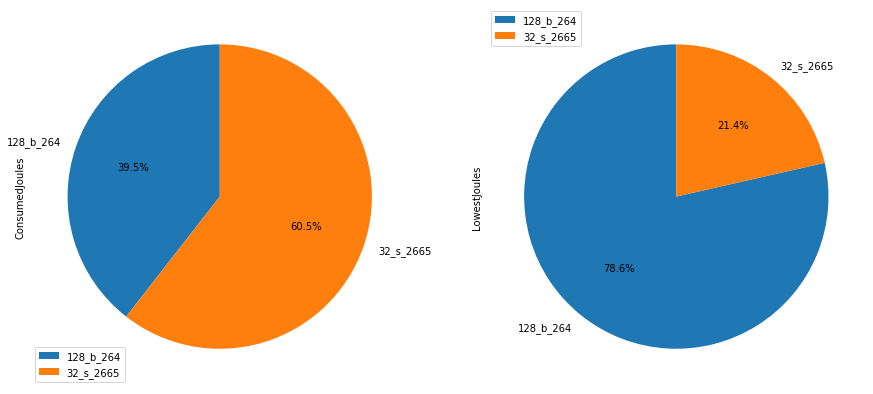

In [45]:
#long energy plot 
gpu_pie = gpu_pie_data.plot.pie(subplots=True, autopct='%1.1f%%',startangle=90, figsize=(15, 8))

In [30]:
# All other partitoions serial, test, long 
